In [181]:
import torch
from torch import nn
from helper_functions import plot_decision_boundary
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles

In [182]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Binary classification

In [183]:
n_samples = 10000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [184]:
X.shape
print(X[:5])

[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]


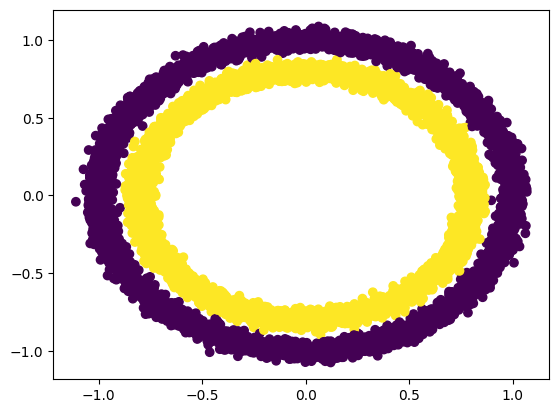

In [185]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [186]:
X = torch.from_numpy(X).float().to(device)
y = torch.from_numpy(y).float().to(device)

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([8000, 2]),
 torch.Size([2000, 2]),
 torch.Size([8000]),
 torch.Size([2000]))

In [188]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 5)
        self.layer_2 = nn.Linear(5, 1)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x
model_0 = CircleModelV0().to(device)


In [189]:
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy with Sigmoid built in
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)


In [190]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_true) * 100

In [191]:
# Training loop
epochs = 100
for epoch in range(epochs):    
    # Training mode
    model_0.train()
    
    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # Calculate loss
    train_loss = loss_fn(y_logits, y_train)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Backward propagation
    train_loss.backward()
    
    # Update model parameters
    optimizer.step()
    
    # Evaluation mode
    model_0.eval()
    with torch.inference_mode():
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      accuracy = accuracy_fn(y_test, test_pred)
      if epoch % 10 == 0:
          print(f"Epoch: {epoch} | Testing Loss: {test_loss:.4f} | Accuracy: {accuracy:.4f}")


Epoch: 0 | Testing Loss: 0.6944 | Accuracy: 51.7500
Epoch: 10 | Testing Loss: 0.6939 | Accuracy: 50.3000
Epoch: 20 | Testing Loss: 0.6933 | Accuracy: 50.2000
Epoch: 30 | Testing Loss: 0.6933 | Accuracy: 50.9000
Epoch: 40 | Testing Loss: 0.6934 | Accuracy: 50.0500
Epoch: 50 | Testing Loss: 0.6933 | Accuracy: 52.1000
Epoch: 60 | Testing Loss: 0.6933 | Accuracy: 50.7000
Epoch: 70 | Testing Loss: 0.6933 | Accuracy: 50.6000


Epoch: 80 | Testing Loss: 0.6933 | Accuracy: 50.8000
Epoch: 90 | Testing Loss: 0.6933 | Accuracy: 50.6500


In [192]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x
model_1 = CircleModelV1().to(device)
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [193]:
# Training loop
epochs = 100
for epoch in range(epochs):    
    # Training mode
    model_1.train()
    
    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # Calculate loss
    train_loss = loss_fn(y_logits, y_train)
    
    # Optimizer zero grad
    optimizer_1.zero_grad()
    
    # Backward propagation
    train_loss.backward()
    
    # Update model parameters
    optimizer_1.step()
    
    # Evaluation mode
    model_1.eval()
    with torch.inference_mode():
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      accuracy = accuracy_fn(y_test, test_pred)
      if epoch % 10 == 0:
          print(f"Epoch: {epoch} | Testing Loss: {test_loss:.4f} | Accuracy: {accuracy:.4f}")

Epoch: 0 | Testing Loss: 0.7088 | Accuracy: 50.6500
Epoch: 10 | Testing Loss: 0.6895 | Accuracy: 56.8500
Epoch: 20 | Testing Loss: 0.6793 | Accuracy: 64.3500
Epoch: 30 | Testing Loss: 0.6576 | Accuracy: 79.3500
Epoch: 40 | Testing Loss: 0.6081 | Accuracy: 91.3000
Epoch: 50 | Testing Loss: 0.5112 | Accuracy: 96.5500
Epoch: 60 | Testing Loss: 0.3718 | Accuracy: 97.4000
Epoch: 70 | Testing Loss: 0.2302 | Accuracy: 98.5000
Epoch: 80 | Testing Loss: 0.1244 | Accuracy: 99.8500
Epoch: 90 | Testing Loss: 0.0681 | Accuracy: 99.9500


## Multiclass classification

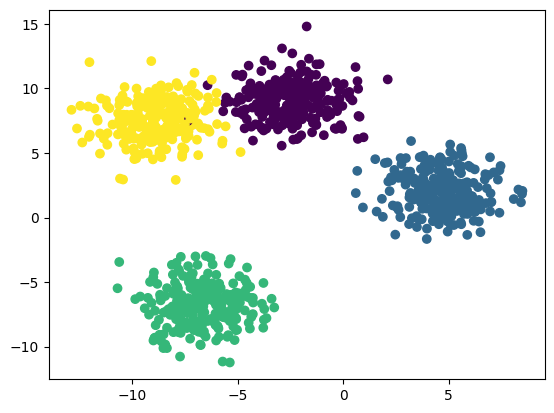

In [199]:
# Multiclass classification
from sklearn.datasets import make_blobs
from torchmetrics import Accuracy
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X, y = make_blobs(n_samples=1000, centers=NUM_CLASSES, n_features=NUM_FEATURES, cluster_std=1.5, random_state=RANDOM_SEED)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [195]:
X = torch.from_numpy(X).float().to(device)
y = torch.from_numpy(y).long().to(device)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([200, 2]) torch.Size([800]) torch.Size([200])


In [198]:
# Model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initialize the model
        Args:
            input_features (int): Number of input features
            output_features (int): Number of output features
            hidden_units (int): Number of hidden units
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )
    def forward(self, x):
        logits = self.linear_layer_stack(x)
        return logits
    
model_2 = BlobModel(NUM_FEATURES, NUM_CLASSES).to(device)

# Loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)
accuracy = Accuracy()

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'

In [ ]:
# Untrained model
model_2.eval()
with torch.inference_mode():
    test_logits = model_2(X_test)

print(test_logits[:5])
test_probs = torch.softmax(test_logits, dim=1)
print(test_probs[:5])

tensor([[-1.0361,  0.7524, -1.0569,  0.2208],
        [ 0.0397,  0.6003, -0.5821,  0.5578],
        [ 0.3010,  0.1331, -0.1375,  0.0837],
        [-0.4203,  0.1999, -0.6247, -0.1345],
        [-1.0166,  0.8409, -1.0410,  0.3164]], device='cuda:0')
tensor([[0.0871, 0.5212, 0.0854, 0.3063],
        [0.2013, 0.3526, 0.1081, 0.3380],
        [0.3035, 0.2566, 0.1958, 0.2442],
        [0.1998, 0.3715, 0.1629, 0.2659],
        [0.0821, 0.5262, 0.0801, 0.3115]], device='cuda:0')


In [177]:
# Training loop
epochs = 100
for epoch in range(epochs):
    # Training mode
    model_2.train()
    
    # Forward pass
    y_logits = model_2(X_train)
    y_pred = torch.argmax(y_logits, dim=1)
    
    # Calculate loss
    train_loss = loss_fn(y_logits, y_train)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Backward propagation
    train_loss.backward()
    
    # Update model parameters
    optimizer.step()
    
    # Evaluation mode
    model_2.eval()
    with torch.inference_mode():
      test_logits = model_2(X_test)
      test_pred = torch.argmax(test_logits, dim=1)
      test_loss = loss_fn(test_logits, y_test)
      acc = accuracy(y_test, test_pred)
      if epoch % 10 == 0 or epoch == 0:
          print(f"Epoch: {epoch} | Testing Loss: {test_loss:.4f} | Accuracy: {acc:.4f}")

Epoch: 0 | Testing Loss: 1.3213 | Accuracy: 48.5000
Epoch: 10 | Testing Loss: 0.7868 | Accuracy: 93.0000
Epoch: 20 | Testing Loss: 0.3863 | Accuracy: 95.5000
Epoch: 30 | Testing Loss: 0.1652 | Accuracy: 99.5000
Epoch: 40 | Testing Loss: 0.0537 | Accuracy: 99.5000
Epoch: 50 | Testing Loss: 0.0249 | Accuracy: 99.5000
Epoch: 60 | Testing Loss: 0.0174 | Accuracy: 99.5000
Epoch: 70 | Testing Loss: 0.0149 | Accuracy: 99.5000
Epoch: 80 | Testing Loss: 0.0137 | Accuracy: 99.5000
Epoch: 90 | Testing Loss: 0.0128 | Accuracy: 99.5000


In [178]:
# Make predictions
model_2.eval()
with torch.inference_mode():
    y_logits = model_2(X_test)
    y_pred = torch.argmax(y_logits, dim=1)

print(y_test[:5])
print(y_pred[:5])

tensor([1, 3, 2, 1, 0], device='cuda:0')
tensor([1, 3, 2, 1, 0], device='cuda:0')


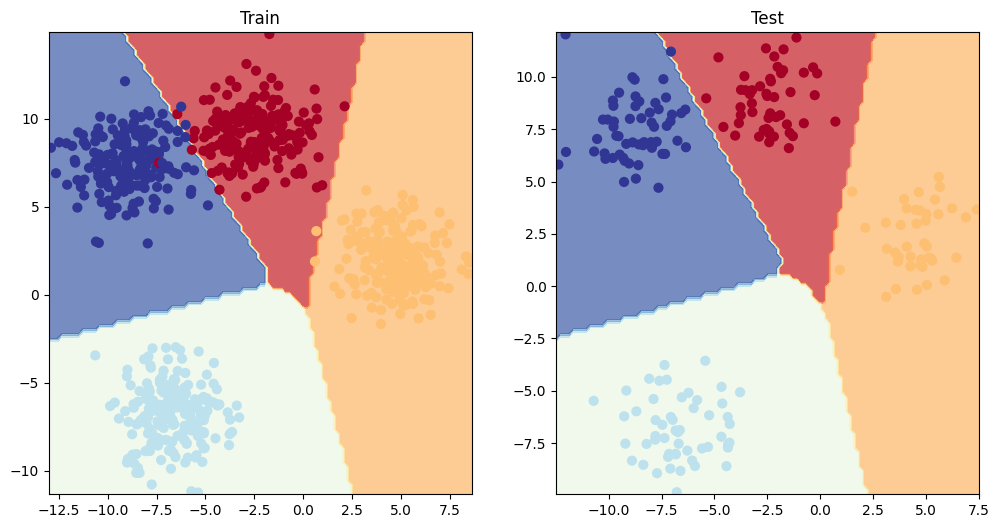

In [180]:
# Decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
    